In [2]:
#BUILDING SIMPLE WORKFLOW

In [4]:
print(
    """
important components of langGraph:
1-Nodes)they are python functions which takes care of logic and does task
2-Edges)Connects nodes-->(conditional edges)
3-state)StateSchema serves as input for all the nodes and edges
STATE_SCHEMA--->it holds information which is further passed on to other nodes.
4-StateGraph) it is the structure of entire graph
"""
)


important components of langGraph:
1-Nodes)they are python functions which takes care of logic and does task
2-Edges)Connects nodes-->(conditional edges)
3-state)StateSchema serves as input for all the nodes and edges
STATE_SCHEMA--->it holds information which is further passed on to other nodes.
4-StateGraph) it is the structure of entire graph



In [7]:
print(
    """
The state schema serves as the central mechanism for communication between nodes in a graph. It acts as a "shared memory" or "notebook" that
 tracks what has happened, stores intermediate results, and guides future decisions


first input(first argument) for all the nodes should be the state_schema
"""

)


The state schema serves as the central mechanism for communication between nodes in a graph. It acts as a "shared memory" or "notebook" that
 tracks what has happened, stores intermediate results, and guides future decisions


first input(first argument) for all the nodes should be the state_schema



In [3]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [5]:
def start_wakeup(state:State):
    return {"graph_info":state['graph_info']+ " I am planning to"}

def study(state:State):
    return {"graph_info":state['graph_info']+ " study"}

def play(state:State):
    return {"graph_info":state['graph_info']+ " play"}

In [6]:
import random
from typing import Literal

def random_pick(state:State)->Literal['study','play']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "play"
    else:
        return "study"
    

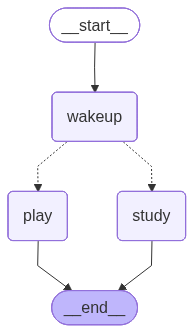

In [10]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END



#building graph
graph=StateGraph(State)

#nodes
#graph.add_node(node_name, function)
graph.add_node("wakeup",start_wakeup)
graph.add_node("study",study)
graph.add_node("play",play)

#scheduling the flow of the graph
graph.add_edge(START,"wakeup")
graph.add_conditional_edges("wakeup",random_pick)
graph.add_edge("study",END)
graph.add_edge("play",END)
##compile
graph_builder=graph.compile()

#
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
graph_builder.invoke({"graph_info":"hey..i just woke up and "})

{'graph_info': 'hey..i just woke up and  I am planning to study'}